In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: insurance.csv           


In [102]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sb
import matplotlib.pyplot as plt


In [103]:
df=pd.read_csv('insurance.csv')

In [104]:
df.shape

(1338, 7)

In [105]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [106]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [107]:
df.dropna(inplace=True)
df.shape

(1338, 7)

In [108]:
df.drop_duplicates(inplace=True)
df.shape

(1337, 7)

In [109]:
df['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [110]:
df['region'].value_counts()

southeast    364
southwest    325
northeast    324
northwest    324
Name: region, dtype: int64

In [111]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## EDA

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


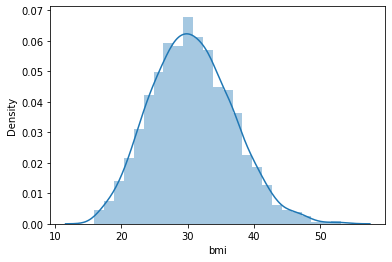

In [112]:
sb.distplot(df['bmi'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


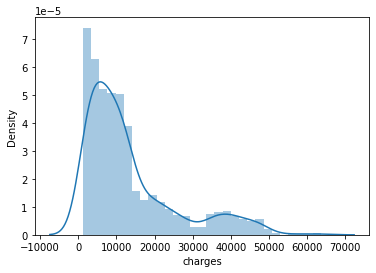

In [113]:
sb.distplot(df['charges'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


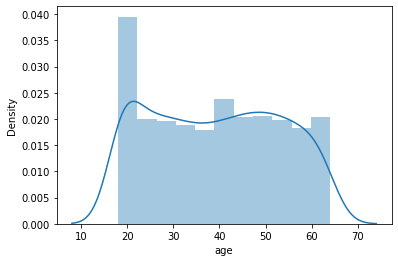

In [114]:
sb.distplot(df['age'])

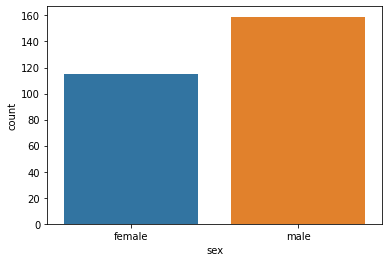

In [115]:
sb.countplot(x='sex',data=df[df['smoker']=='yes'])

There are more female than male smokers

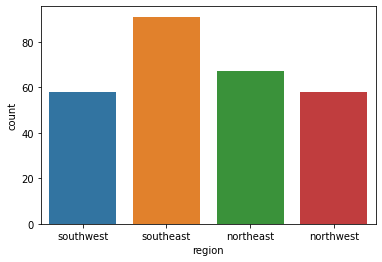

In [116]:
sb.countplot(x='region',data=df[df['smoker']=='yes'])

South east hast the most no of smokers

In [117]:
bins=[10,15,20,25,30,35,40,45,50]
df['binned_bmi']=pd.cut(df['bmi'],bins)

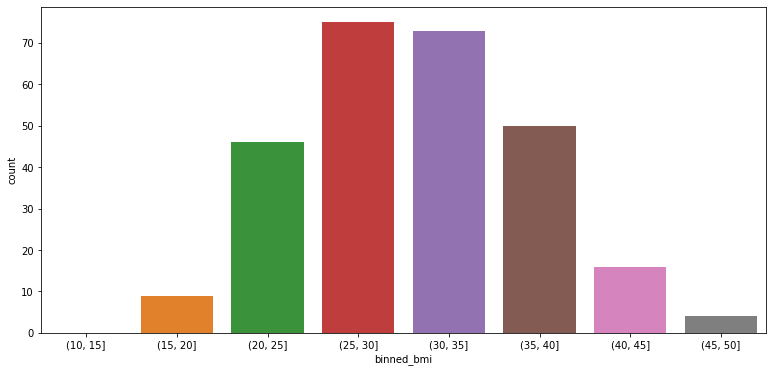

In [118]:
plt.figure(figsize=(13,6))
sb.countplot(x='binned_bmi',data=df[df['smoker']=='yes'])

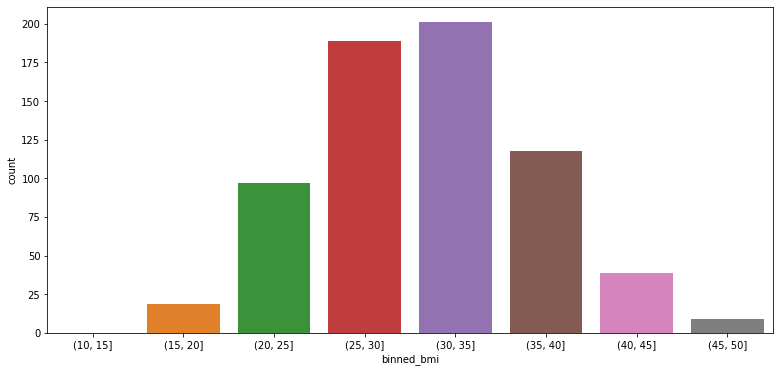

In [119]:
plt.figure(figsize=(13,6))
sb.countplot(x='binned_bmi',data=df[df['sex']=='male'])

We can observe most men have a bmi between 30-35

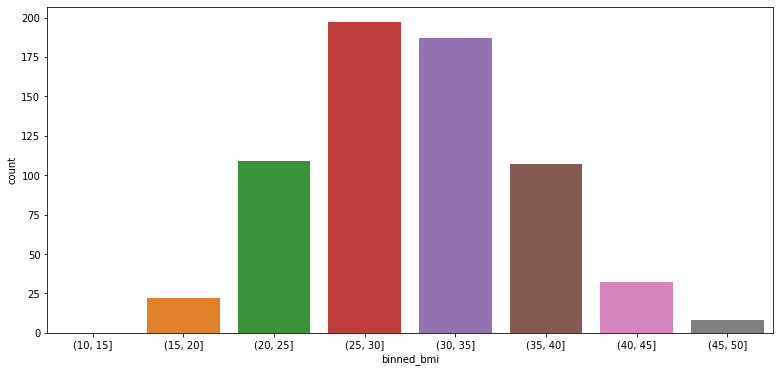

In [120]:
plt.figure(figsize=(13,6))
sb.countplot(x='binned_bmi',data=df[df['sex']=='female'])

We can observe most women have a bmi between 25-30

In [124]:
bins=[10,15,20,25,30,35,40,45,50,55,60,65]
df['binned_age']=pd.cut(df['age'],bins)

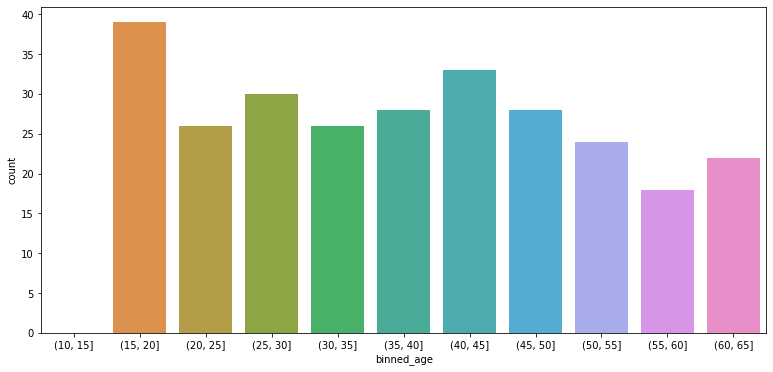

In [125]:
plt.figure(figsize=(13,6))
sb.countplot(x='binned_age',data=df[df['smoker']=='yes'])

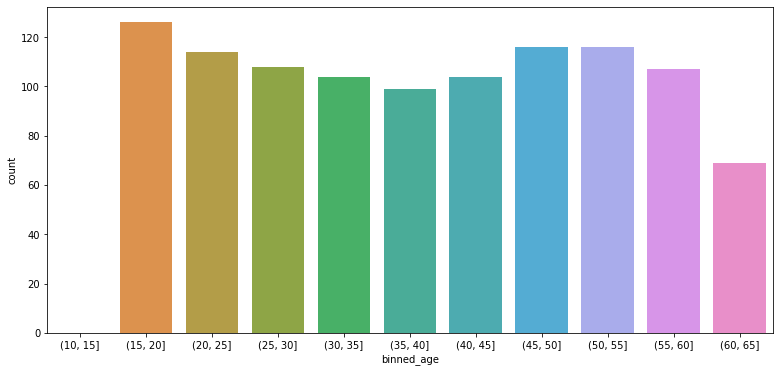

In [126]:
plt.figure(figsize=(13,6))
sb.countplot(x='binned_age',data=df[df['smoker']=='no'])

In [127]:
df.drop(['binned_age','binned_bmi'],axis=1,inplace=True)

## Label Encoding all categorical features

In [128]:
from sklearn.preprocessing import LabelEncoder
def labelEncoding(column_name):
  lb=LabelEncoder()
  df[column_name]=lb.fit_transform(df[column_name])


In [129]:
labelEncoding('sex')
labelEncoding('smoker')
labelEncoding('region')

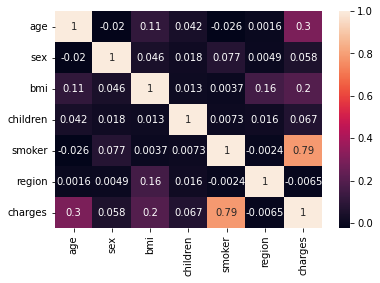

In [130]:
sb.heatmap(df.corr(),annot=True)

We can conclude from here that there is a moderate correlation between the features smoker and charges.

## Modelling

In [92]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]

In [93]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=42)

In [94]:
from sklearn.linear_model import LinearRegression

lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [96]:
y_pred=lr_model.predict(x_test)

## Performance Metrics

#### R-Square

In [98]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8068466322629112

#### RMSE

In [100]:
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_test,y_pred))

5957.608799816459

In [131]:
import pickle
pickle.dump(lr_model,open('medical_cost_lr_model.pkl','wb'))